<p align="center"> <img style=" margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="350" height="150" /> 
    
    
## <H1 align="center"> <font color='white'> Quantitative Finance </H1>

### <H3 align="center"> <font color='white'> NPV & IRR of given data </H1>

 <H5 align="center"> <em> Professor: Zárate Carbajal José Mario <em>

 <strong> <H5 align="right"> Student: Márquez Delgado Esteban <strong>

 *Registry*: if700637

 Date: August 26, 2022

 <center> <font color= #555555> <font size = 4> Jun 2021 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/EstebanMqz/Quantitative-Finance/blob/main/Tarea%201_Márquez%20Delgado%20Esteban.ipynb'>Link</a></font>

Note: *Run All* command can be used to execute notebook.

<H5 align="left"> <font color='blue'> <strong> Libraries </H5><strong>

In [1]:
import pandas as pd
import numpy as np
from datetime import date
from pyxirr import xirr

In [2]:
data = pd.read_csv('Data_OilCompany.csv')
data.dtypes

  Year 1      int64
  Year 2      int64
  Year 3      int64
  Year 4      int64
  Year 5      int64
dtype: object

In [3]:
Price =5
Cost=-.8
Fixed=-40000
I_inv=-1800000
rf=.03
data.head()
data.columns=data.columns.str.replace('Year', ' ').astype('int') #Col labels to int. (MUST RUN LINE ONCE)

<H5 align="left"> <font color='blue'> <strong> Net Present Value </H5><strong>

In [4]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

for i in range(len(data.columns)):                                              
    data_pv=((data*Price)+(data*Cost)+Fixed)/(1+rf)**data.columns
    data_pv.insert(loc=0, column=0, value=I_inv) #Initital investment in t=0
    data_pv.insert(loc=len(data_pv.columns), column=len(data_pv.columns), value=data_pv.sum(axis='columns')) #NPV
    
data_pv=data_pv.set_axis([*data_pv.columns[:-1], 'NPV'], axis=1, inplace=False) #Name NPV col. 
data_pv 


,0,1,2,3,4,5,NPV
0,-1800000,791892.4,1070666.2,1751830.6,712450.2,314455.2,2841294.7
1,-1800000,1037037.9,1040855.7,-28180.5,710420.2,-34504.4,925628.9
2,-1800000,74222.5,1287978.3,279587.7,710618.0,200835.7,753242.2
3,-1800000,1159188.5,794128.9,1020717.3,710543.3,-34504.4,1850073.8
4,-1800000,1173533.8,922603.3,1747195.2,713021.2,477365.1,3233718.6
...,...,...,...,...,...,...,...
1995,-1800000,929860.4,1033056.7,406526.2,710069.4,186680.8,1466193.5
1996,-1800000,844098.8,995589.6,294047.3,712692.8,-34504.4,1011924.1
1997,-1800000,981712.0,836821.8,1812693.9,710043.3,-25182.5,2516088.5
1998,-1800000,984868.2,944642.5,1425497.9,711162.8,415499.5,2681670.8


<H5 align="left"> <font color='blue'> <strong> Interest Rate Return </H5><strong>

In [5]:
#Required library
!pip install pyxirr

Future Values in period k

In [6]:
#drop I_inv and NPV
data_pv.drop([0, 'NPV'], axis=1, inplace=True) #(MUST RUN LINE ONCE)
irr=pd.DataFrame((data_pv[[1, 2, 3, 4, 5]]*(1+rf)**data_pv.columns).values) #Present Values
irr.columns=irr.columns+1 
irr.insert(loc=0, column=0, value=I_inv)
irr

,0,1,2,3,4,5
0,-1800000,815649.2,1135869.8,1914272.6,801869.0,364539.8
1,-1800000,1068149.0,1104243.8,-30793.6,799584.2,-40000.0
2,-1800000,76449.2,1366416.2,305513.0,799806.8,232823.6
3,-1800000,1193964.2,842491.4,1115365.4,799722.8,-40000.0
4,-1800000,1208739.8,978789.8,1909207.4,802511.6,553397.0
...,...,...,...,...,...,...
1995,-1800000,957756.2,1095969.8,444222.2,799189.4,216414.2
1996,-1800000,869421.8,1056221.0,321313.4,802142.0,-40000.0
1997,-1800000,1011163.4,887784.2,1980779.6,799160.0,-29193.4
1998,-1800000,1014414.2,1002171.2,1557680.0,800420.0,481677.8


IRR 

*The print of the list compression is saved with an io method which is called as **a** on the next cell to obtain IRR*.

In [7]:
import io 
dates = [date(2020, 1, 1), date(2021, 1, 1), date(2022, 1, 1), date(2023, 1, 1), date(2024, 1, 1), date(2025, 1, 1)]
# feed columnar data
xirr(dates, irr.values[0])
# feed tuples
xirr(zip(dates, irr.values[0]))
# feed DataFrame
f = io.StringIO()
[print(xirr(pd.DataFrame({"dates": dates, "amounts": irr.values[n]})),file=f) for n in range(len(irr))][0]

In [8]:
pd.options.display.float_format = '{:,.4f}'.format
# to get the value back
a = f.getvalue()
a= pd.DataFrame((a.split())).astype(float)*100


*Finally, a dataframe with the initial investment in column 0 and the present value of period(s) k are computed. The Net Present Value represents the sum of PVs in period(s) k and the IRR represents the return of the future values of given data in cell 4°.*

In [9]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

for i in range(len(data.columns)):                                              
    data_pv=((data*Price)+(data*Cost)+Fixed)/(1+rf)**data.columns
    data_pv.insert(loc=0, column=0, value=I_inv) #Initital investment in t=0
    data_pv.insert(loc=len(data_pv.columns), column=len(data_pv.columns), value=data_pv.sum(axis='columns')) #NPV
    
data_pv=data_pv.set_axis([*data_pv.columns[:-1], 'NPV'], axis=1, inplace=False) #Name NPV col. 
data_pv['IRR'] = a
data_pv

,0,1,2,3,4,5,NPV,IRR
0,-1800000,791892.4272,1070666.2268,1751830.6036,712450.2206,314455.2337,2841294.7120,50.7374
1,-1800000,1037037.8641,1040855.6886,-28180.5062,710420.2054,-34504.3514,925628.9005,27.1809
2,-1800000,74222.5243,1287978.3203,279587.6738,710617.9826,200835.6826,753242.1835,16.6773
3,-1800000,1159188.5437,794128.9471,1020717.3429,710543.3497,-34504.3514,1850073.8321,43.4534
4,-1800000,1173533.7864,922603.2614,1747195.2281,713021.1624,477365.1135,3233718.5517,59.0002
...,...,...,...,...,...,...,...,...
1995,-1800000,929860.3883,1033056.6500,406526.2412,710069.4307,186680.7900,1466193.5003,34.2235
1996,-1800000,844098.8350,995589.5937,294047.2780,712692.7776,-34504.3514,1011924.1330,26.7004
1997,-1800000,981712.0388,836821.7551,1812693.9300,710043.3092,-25182.4833,2516088.5498,50.2977
1998,-1800000,984868.1553,944642.4734,1425497.8599,711162.8029,415499.5015,2681670.7931,50.1033


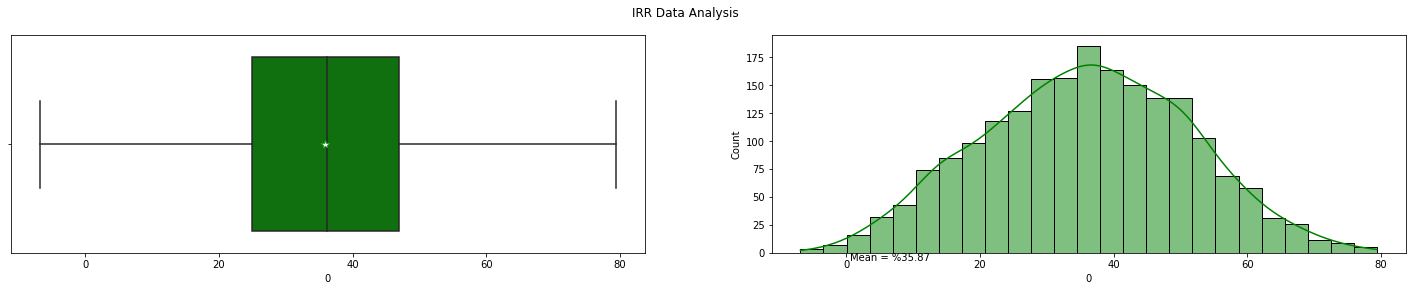

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def BoxHist(data, size, color, title):
    """

    BoxHist plots a boxplot and a histogram for a given cuantitative dataset.

    *data : dataset.
    *size : Size tupla (width, height).
    *color : Plots color.
    *title : Title.   
    """
    fig, axes = plt.subplots(1, 2, figsize = size)
    fig.suptitle(title)
    plt.text(.5,.5,str('Mean = %')+str(round(data.mean(),2)), horizontalalignment='left', verticalalignment='top')
    sns.boxplot(x = data, ax = axes[0], color = color, showmeans=True, meanprops={"marker":"*","markerfacecolor":"white","markersize":"8.5"})
    sns.histplot(x = data, ax = axes[1], kde = True, color = color)

BoxHist(a[0], (25,4), 'green', 'IRR Data Analysis')

1. ¿What the probability that the IRR is over the Risk free rate?

In [11]:
from random import *
s=pd.DataFrame(choices(a[0], k=100000))
((s[s > 3.0 ].count()[0])/len(s))*100

98.831

*The answer to this question, stochastic probabilities should be taken into consideration within given data. With 100,000 simulations from the IRR shown above, the chance of having a greater IRR than 3% is 98.83%.*

2. What the probability that the IRR is over the 35%?

In [12]:
s2=pd.DataFrame(choices(a[0], k=100000))
((s2[s2 > 35.0 ].count()[0])/len(s2))*100

53.337

*The chance of having an IRR greater than 35% is 53.34%.*

3. What the probability that the project value is over $2M?

In [13]:
s3=pd.DataFrame(choices(data_pv['NPV'], k=100000))
((s3[s3 > 2000000.0 ].count()[0])/len(s3))*100

40.293

*The chance of having an NPV greater than 2m is 40.29%.*

4. What’s the probability that the IRR is between 10% and 20%?

In [14]:
s4=pd.DataFrame(choices(data_pv['IRR'], k=100000))
p1=((s4[s4>10].count()[0])/len(s4))*100
p2=((s4[s4<20].count()[0])/len(s4))*100
p2-(100-p1) #or p1-(100-p2), which is the difference between (100-p2,p2)

11.93999999999999

*The chance of having an IRR between 10% and 20% is 11.94%.*